This project has a record of flight details from Washington,DC area into New York city during the year of 2004 in the month of January. The main aim of the project is to predict if a new flight will be delayed or not from the provided data using `'MACHINE LEARNING'` 

PART 1 of this would be an `Exploratory Data Analysis` where various features(columns) in the provided dataset will be analyzed using various methods to interpret their relation and visualize them

PART 2 will be `Model Training` based on Naive Bayes theorem and train them to pedict whether the flight arrives at ontime or it gets delayed.

#### Highlights of the data

The data consists of 10 features (columns) namely

- Carrier
- Departure_Time
- Destination
- Date
- Flight_Number
- Origin
- Day_of_the_Week
- Day_of_the_Month

##### Day of the Week
Each number represents the corresponding day
- 1- Monday
- 2- Tuesday
- 3- Wednesday
- 4- Thursday
- 5- Friday
- 6- Saturday
- 7- Sunday

##### Day of the Month
Each number represents the days in a month.

#### Abbreviations
##### Carrier 

- CO - Continental
- DH - Atlantic Coast
- DL - Delta
- MQ - American Eagle
- OH - Comair
- RU - Continental Express
- UA - United
- US - USAirways

##### Destination 

- JFK - Kennedy
- LGA - LaGuardia
- EWR - Newark

##### Origin

- DCA - Reagan National
- IAD - Dulles
- BWI - Baltimore–Washington Int’l


# EXPLORATORY DATA ANALYSIS

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the dataset
df=pd.read_csv('E:\\DA_PROJECTS\\ML\\Flight Data.csv')
df

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,01-01-04,7792,IAD,4,1,ontime
...,...,...,...,...,...,...,...,...,...,...
2194,RU,644,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,1653,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,1558,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,1403,EWR,199,1/31/2004,2216,DCA,6,31,ontime


The entire details in the dataset is imported and displayed as `2199 rows` and `10 columns`

In [4]:
#showing the first 5 rows
df.head()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,01-01-04,7792,IAD,4,1,ontime


In [5]:
#showing last 5 rows
df.tail()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
2194,RU,644,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,1653,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,1558,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,1403,EWR,199,1/31/2004,2216,DCA,6,31,ontime
2198,RU,1736,EWR,199,1/31/2004,2097,DCA,6,31,ontime


In [6]:
#obtaining the shape of the dataset
df.shape

(2199, 10)

In [7]:
#displaying the column present in the dataset
df.columns

Index(['Carrier', 'Departure Time', 'Destination', 'Distance', 'Date',
       'Flight Number', 'Origin', 'Day of the Week', 'Day of the Month',
       'Delayed '],
      dtype='object')

As the column name in the dataset contains space in between two words, replacement of space with an underscore is done as the interpreter shows error in presence of space between words 

In [8]:
#replacing spaces with an underscore
df.columns=[col.replace(' ','_') for col in df.columns]
df.columns

Index(['Carrier', 'Departure_Time', 'Destination', 'Distance', 'Date',
       'Flight_Number', 'Origin', 'Day_of_the_Week', 'Day_of_the_Month',
       'Delayed_'],
      dtype='object')

As the `Delayed` column contains space at an end which eventually got relaced by an underscore,the name gets replaces without having an underscore

In [9]:
#renaming the column
df=df.rename(columns={'Delayed_':'Delayed'})
df

,Carrier,Departure_Time,Destination,Distance,Date,Flight_Number,Origin,Day_of_the_Week,Day_of_the_Month,Delayed
0,OH,1455,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,01-01-04,7792,IAD,4,1,ontime
...,...,...,...,...,...,...,...,...,...,...
2194,RU,644,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,1653,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,1558,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,1403,EWR,199,1/31/2004,2216,DCA,6,31,ontime


##### Displaying datatype information of the dataset

In [10]:
#displaying the data type info for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Carrier           2199 non-null   object
 1   Departure_Time    2199 non-null   int64 
 2   Destination       2199 non-null   object
 3   Distance          2199 non-null   int64 
 4   Date              2199 non-null   object
 5   Flight_Number     2199 non-null   int64 
 6   Origin            2199 non-null   object
 7   Day_of_the_Week   2199 non-null   int64 
 8   Day_of_the_Month  2199 non-null   int64 
 9   Delayed           2199 non-null   object
dtypes: int64(5), object(5)
memory usage: 171.9+ KB


##### Statistical information of the dataset

In [11]:
#statistical description of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Departure_Time,2199.0,1370.490223,440.893123,548.0,1011.0,1450.0,1709.0,2330.0
Distance,2199.0,211.855844,13.312840,169.0,213.0,214.0,214.0,229.0
Flight_Number,2199.0,3811.567531,2408.017328,746.0,2156.0,2385.0,5935.0,7924.0
Day_of_the_Week,2199.0,3.906321,1.902862,1.0,2.0,4.0,5.0,7.0
Day_of_the_Month,2199.0,16.020464,8.679829,1.0,8.0,16.0,23.0,31.0


In [12]:
#to find the presence of null value
df.isnull().sum()

Carrier             0
Departure_Time      0
Destination         0
Distance            0
Date                0
Flight_Number       0
Origin              0
Day_of_the_Week     0
Day_of_the_Month    0
Delayed             0
dtype: int64

   As the data doesn't contains any null and duplicate values,tideous process aren't involved while handling the data 

### DATA PRE-PROCESSING

As the `Departure Time` has both hours and minutes combined together, only hours is retained and minutes are removed off 
- the first digits are taken as hours and last two digits as minutes

In [13]:
#slicing only the hours from departure time
df['Departure_Time']=df['Departure_Time'].astype(str).str.zfill(4).str[:2].astype(int)
df

,Carrier,Departure_Time,Destination,Distance,Date,Flight_Number,Origin,Day_of_the_Week,Day_of_the_Month,Delayed
0,OH,14,JFK,184,01-01-04,5935,BWI,4,1,ontime
1,DH,16,JFK,213,01-01-04,6155,DCA,4,1,ontime
2,DH,12,LGA,229,01-01-04,7208,IAD,4,1,ontime
3,DH,17,LGA,229,01-01-04,7215,IAD,4,1,ontime
4,DH,10,LGA,229,01-01-04,7792,IAD,4,1,ontime
...,...,...,...,...,...,...,...,...,...,...
2194,RU,6,EWR,199,1/31/2004,2761,DCA,6,31,ontime
2195,RU,16,EWR,213,1/31/2004,2497,IAD,6,31,ontime
2196,RU,15,EWR,199,1/31/2004,2361,DCA,6,31,ontime
2197,RU,14,EWR,199,1/31/2004,2216,DCA,6,31,ontime


### CORRELATION

Correlation is an important statistical feature which shows the relationship between the variables in various visualization forms such as heatmaps.In this project,`Pearson` method of correlation is used to find the statistical relationship between the variables. 

In [14]:
#displaying the correlation between the columns of the flght dataset
corelation=df.corr()
corelation

,Departure_Time,Distance,Flight_Number,Day_of_the_Week,Day_of_the_Month
Departure_Time,1.000000,0.063778,0.118204,0.051351,0.002313
Distance,0.063778,1.000000,0.420868,-0.020397,0.009459
Flight_Number,0.118204,0.420868,1.000000,0.019334,-0.010119
Day_of_the_Week,0.051351,-0.020397,0.019334,1.000000,0.015955
Day_of_the_Month,0.002313,0.009459,-0.010119,0.015955,1.000000


### Correlation between the variables

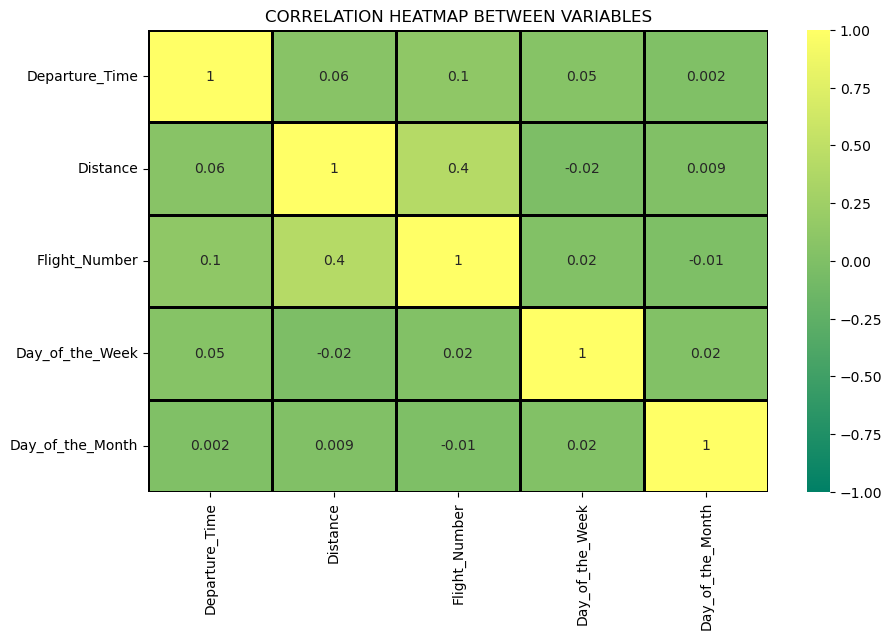

In [15]:
#creating PEARSON correlation
corr_df=df.corr(method="pearson")
plt.figure(figsize=(10,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="summer",linewidths=1,linecolor="Black")
heatmap.set_title("CORRELATION HEATMAP BETWEEN VARIABLES")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
plt.show()

The above heatmap gives the statistical relation(either positively or negatively related) for numerical features

## DATA VISUALIZATION

### PAIRPLOT
Pairplot is used for exploring the relationships between multiple variables in this dataset, among the numerical features
In a pairplot, the diagonal shows a histogram or density plot of the distribution of each variable

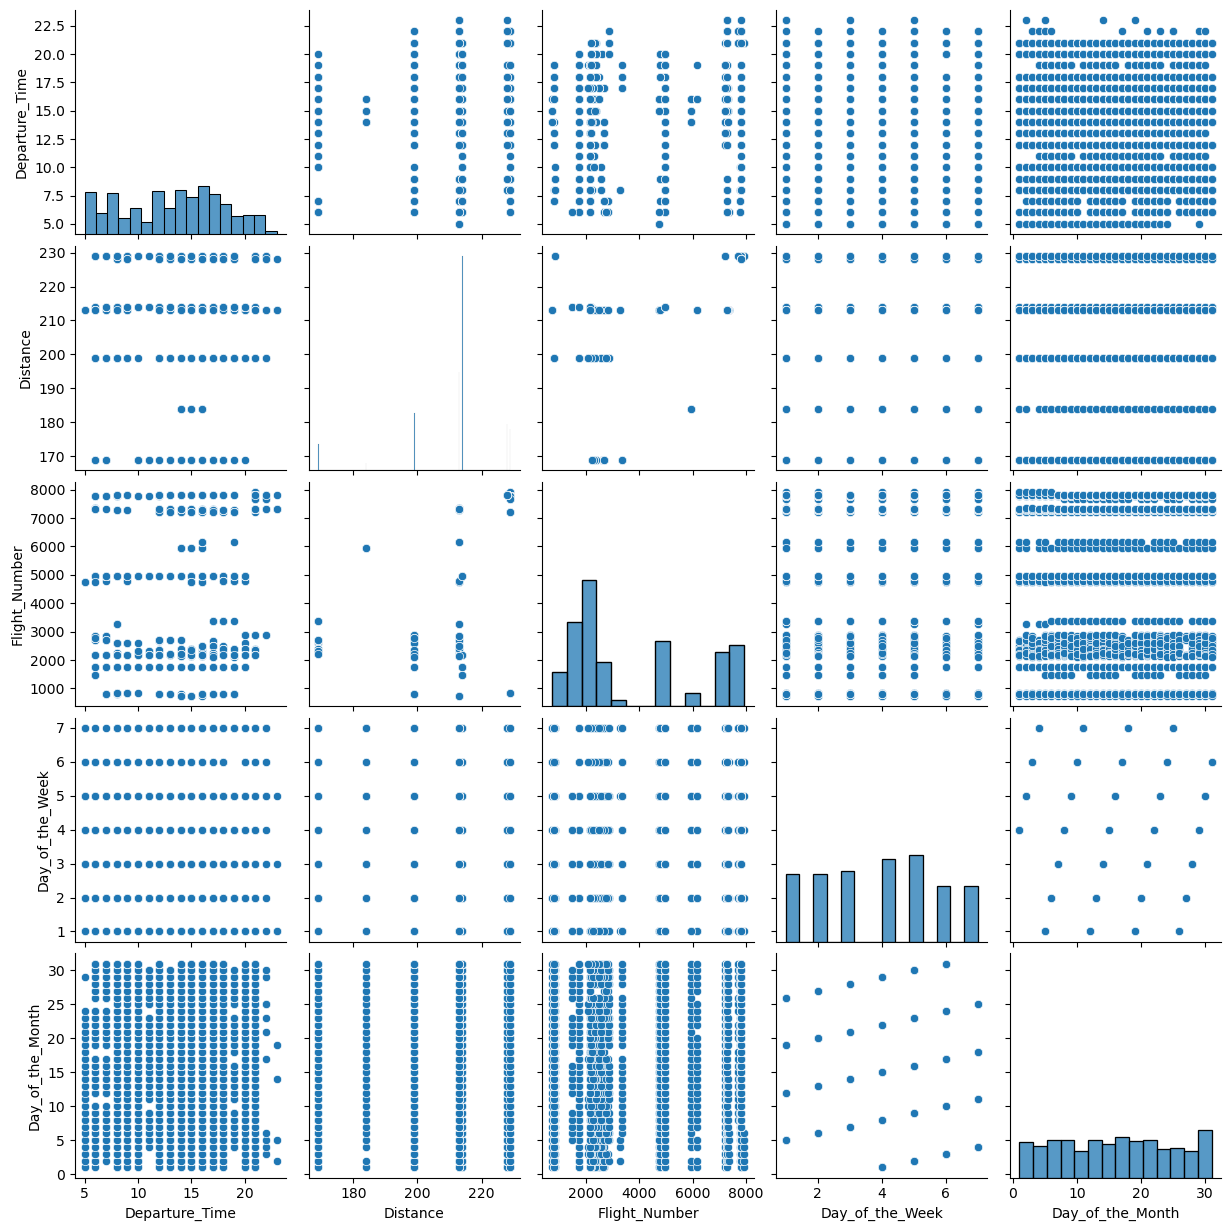

In [16]:
sns.pairplot(df)

This Pairlot shows the relation between the numerical datas in our dataset. `Scatter plot` and `Barplot`are used to map the relation 

### BOXPLOT

### Boxplot for flight number

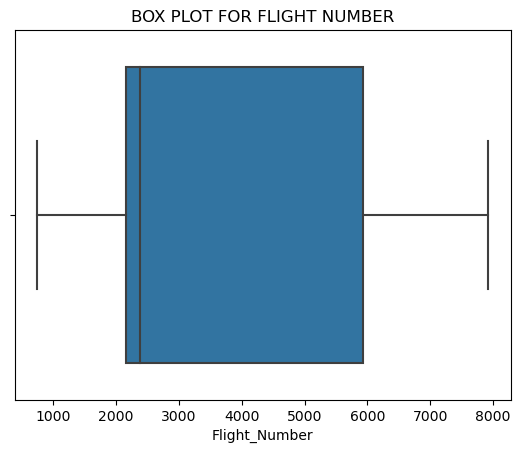

In [17]:
plt.title('BOX PLOT FOR FLIGHT NUMBER')
sns.boxplot(x='Flight_Number',data=df)
plt.show()

### Boxpot for distance and carrier

The above boxplot is for determining outliers for the flight number being travelled. No irrelavent flight numbers were found as it has no outliers

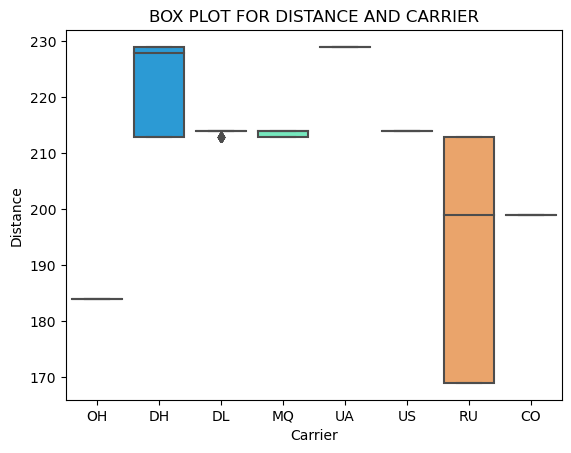

In [18]:
plt.title('BOX PLOT FOR DISTANCE AND CARRIER')
sns.boxplot(x='Carrier',y='Distance',data=df,palette='rainbow')
plt.show()

Box plot for distance and carrier is been plotted to find the outliers

### Plotting On-Time and Delayed status of flight

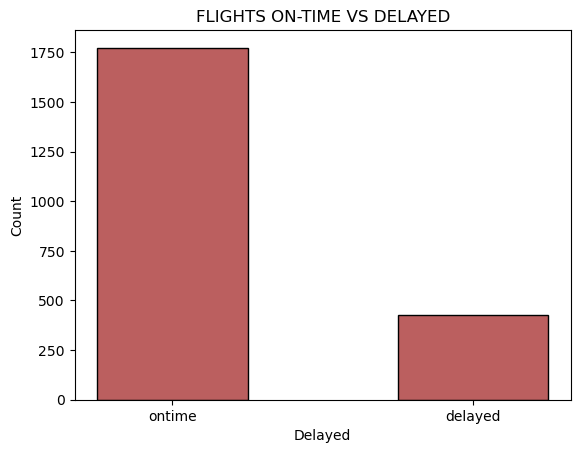

In [19]:
#count of flights which were ontime and delayed
t=df['Delayed'].value_counts()
plt.title('FLIGHTS ON-TIME VS DELAYED')
sns.histplot(x='Delayed',color='brown',shrink=0.5,data=df)
plt.show()

This visualization shows the number of flights which were `on-time` and `delayed`.

- Most of the flights are `On-Time`.
- Few flights were `Delayed`.

### Plot for the status of flight based on Origin

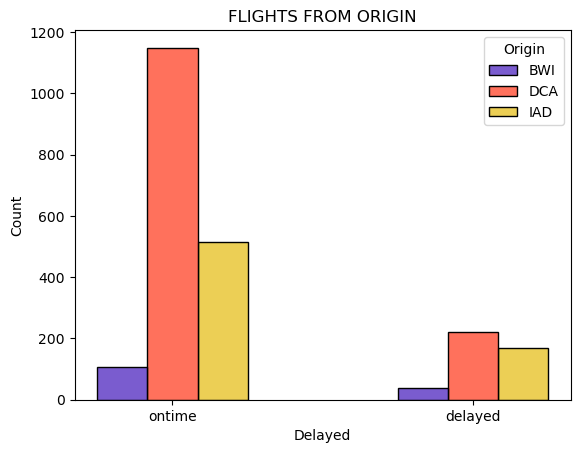

In [20]:
#determining flights from origin based on arrival 
plt.title('FLIGHTS FROM ORIGIN')
sns.histplot(x='Delayed',hue='Origin',palette='CMRmap',binwidth=.8,shrink=.5,multiple='dodge',data=df)
plt.show()

This plot shows the status of number of flights which were from various origin. We can see that many flights reached `On Time` and small proportion of flights were `late`.  

On-Tme stats
- `DCA` has most number flights which were `On-Time` compared with others  
- Flights from `BWI` were less on time

Delayed stats
- More number flights got delayed from `DCA`
- `BWI` has less number of delayed flights  

### Plot for the status of flight based on Carrier

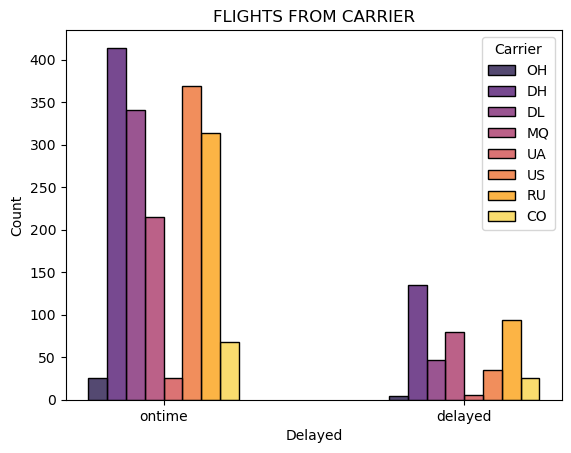

In [31]:
##determining flights from carrier based on arrival 
plt.subplot()
plt.title('FLIGHTS FROM CARRIER')
sns.histplot(data=df,x='Delayed',hue='Carrier',palette='inferno',shrink=.5,multiple='dodge')
plt.show()

This plot shows the status of number of flights which were from various carrier. We can see that many flights reached on time from Carrier and small proportion of flights were late. 

On-Tme stats
- `DH` has most number flights which were `On-Time` compared with others  
- Flights from `OH` were less on time

Delayed stats
- More number flights got delayed from `DH`
- `OH` has less number of delayed flights  

### Plot for the status of flight based on Destinatino

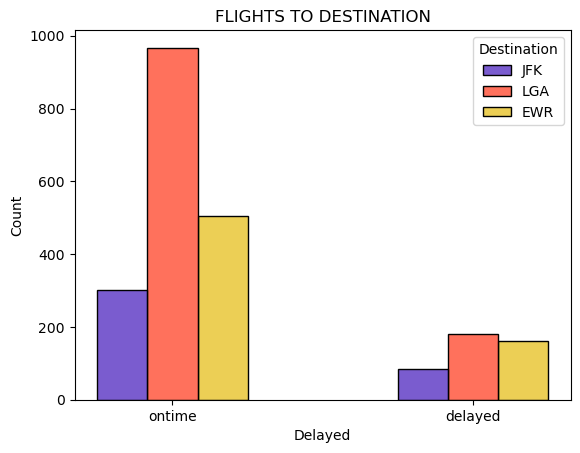

In [32]:
#determining flights from destination based on arrival 
plt.title('FLIGHTS TO DESTINATION')
sns.histplot(x='Delayed',hue='Destination',palette='CMRmap',binwidth=.8,shrink=.5,multiple='dodge',data=df)
plt.show()

This plot shows the status of number of flights which reached different destinations.

On-Tme stats
- `LGA` has most number where flights reached `On-Time` compared with others  
- Flights from `JFK` were less on time

Delayed stats
- More number flights got delayed to reach `LGA`
- `JFK` has less number of delayed flights  

### Relplot for arrival of flights based on destination

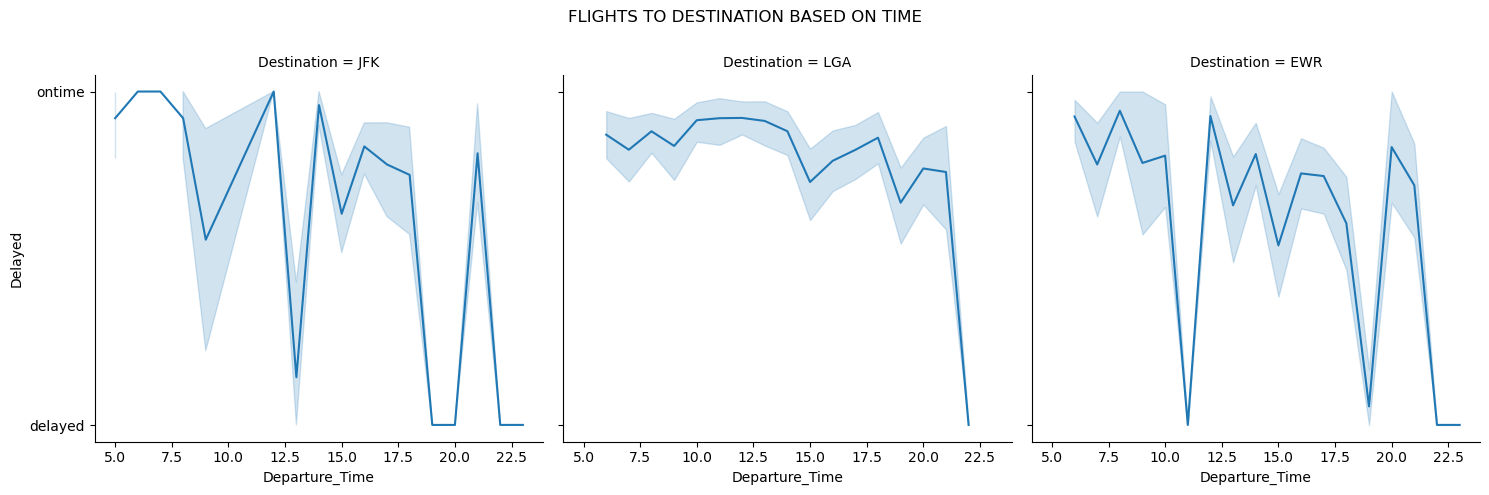

In [33]:
#showing the arrival of flight based on its destination
y=sns.relplot(data=df,x='Departure_Time',y='Delayed',kind='line',col='Destination')
y.fig.suptitle("FLIGHTS TO DESTINATION BASED ON TIME")
plt.subplots_adjust(top=0.85)
plt.show()

This relplot shows the relation between departure time of the flight and status of the flight. 

- Flights between `18` to `20` hours and above`22.5` hours has reached the destination `JFK1` getting `Delayed
- Most of Flights reaching `LGA` were `On-Time`
- Flights between `10` to `11` hours and at `22` hours has `Delayed` flight for destiantion `EWR`

### Showing the flight traffic based on days in a week 

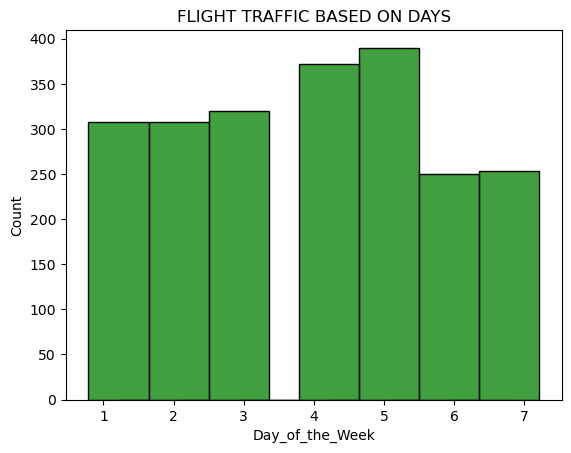

In [34]:
#flight traffic on days in a week 
plt.title('FLIGHT TRAFFIC BASED ON DAYS')
sns.histplot(x='Day_of_the_Week',data=df,shrink=2,color='Green')
plt.show()

This chart shows the flight tarffic for each day in a week

- `Friday` has more traffic than anyother days
- `Saturday` has less traffic than other days

### Showing the flight traffic based on monthly days

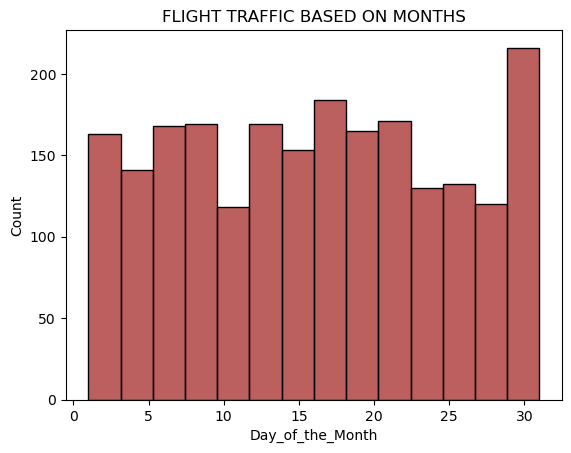

In [35]:
#flight traffic on days in a month
plt.title('FLIGHT TRAFFIC BASED ON MONTHS')
sns.histplot(x='Day_of_the_Month',data=df,color='Brown')
plt.show()

This chart shows the flight tarffic for each day in a month

- Day `30` has more traffic than anyother days
- Day `10` to `12` has less traffic than other days

### Occurence of carrier variable

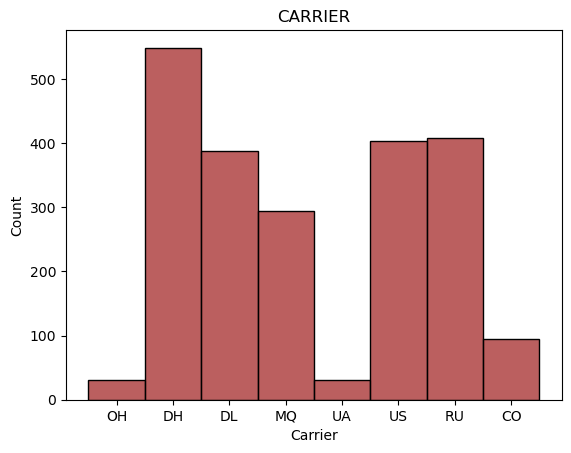

In [36]:
#occurence of carrier variable
plt.title('CARRIER')
sns.histplot(data=df,x='Carrier',color='Brown')
plt.show()

This plot shows the distribution of the carrier variables(occurence of the carrier variable)

- `DH` has repeated more time
- `OH` and `UA` are less repeated

### Plotting the proportion of destination and origin part of the flight

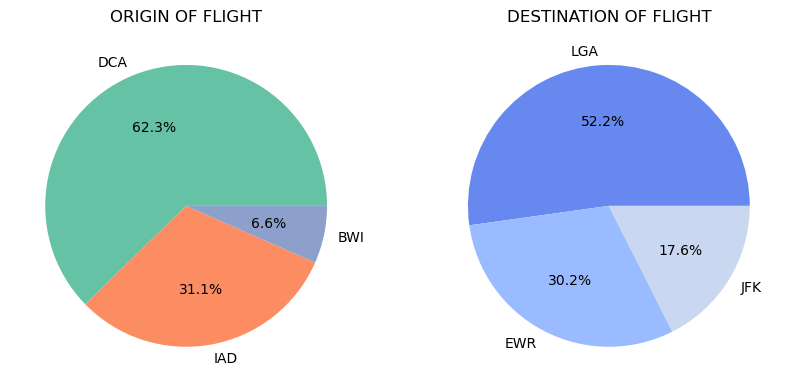

In [37]:
#determing the most occurred destination and origin
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
origin_counts=df['Origin'].value_counts()
plt.title('ORIGIN OF FLIGHT')
color=sns.color_palette('Set2')
plt.pie(x=origin_counts.values,labels=origin_counts.index,autopct='%1.1f%%',colors=color)

plt.subplot(1,2,2)
destination_counts=df['Destination'].value_counts()
plt.title('DESTINATION OF FLIGHT')
color=sns.color_palette('coolwarm')
plt.pie(x=destination_counts.values,labels=destination_counts.index,autopct='%1.1f%%',colors=color)

plt.show()

This pie-chart shows the individual count of flight for destination and origin along with their percentile.

###### ORIGIN
- `DCA` has most of the flight origin than other two  
- `BWI` has less number of origin of flight than other two. 
##### DESTINATION
- `LGA` has more arrival than other two
- `JFK` has less number of arrial than other two

### Flight reach on days in a week

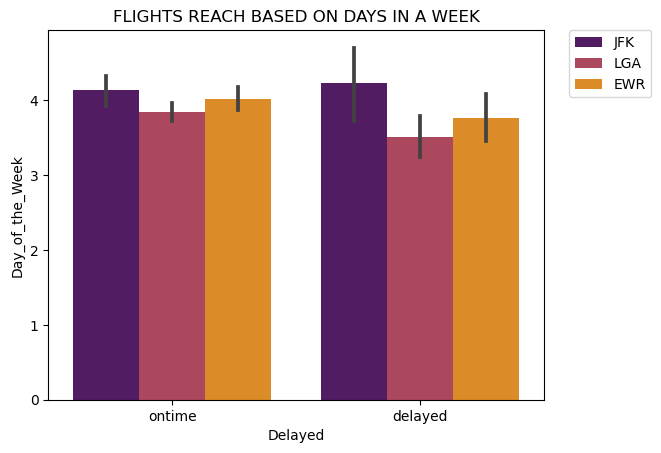

In [59]:
#Determining the status of flight traffic in a week
plt.title('FLIGHTS REACH BASED ON DAYS IN A WEEK')
sns.barplot(x='Delayed',y='Day_of_the_Week',hue='Destination',palette='inferno',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0.)
plt.show()

This plot shows the status of number of flights which reached the destinations on different days in a week.

On-Tme stats
- `JFK` has reached mostly on `5th` day 
- `LGA` has reached nearly to the`4th` day
- `EWR` has reached mostly on `4th` day

Delayed stats
- `JFK` has reached mostly on `5th` day 
- `LGA` has reached mostly in between `3rd` and `4th` day
- `EWR` has reached mostly in between `3rd` and `4th` day


### Flight reaching on days in a week

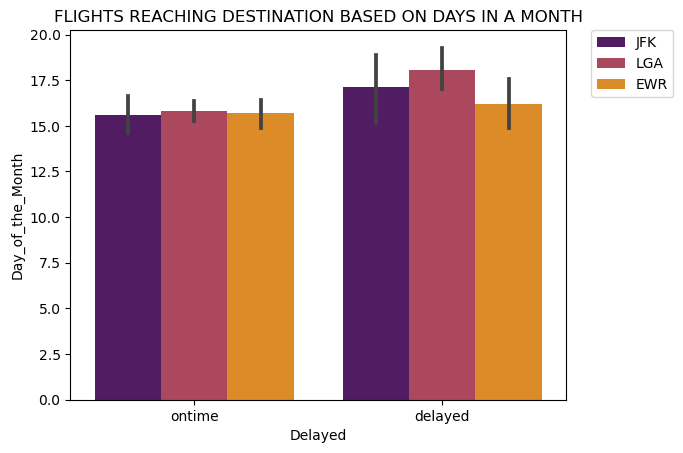

In [29]:
#Determining the status of flight traffic in a month 
plt.title('FLIGHTS REACHING DESTINATION BASED ON DAYS IN A MONTH')
sns.barplot(x='Delayed',y='Day_of_the_Month',hue='Destination',palette='inferno',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0.)
plt.show()

This plot shows the status of number of flights which reached the destinations on different days in a month.

On-Tme stats
- `JFK`,`LGA`,`EWR` has reached mostly on `16th` day in a month

Delayed stats
- `JFK` has reached mostly on `17th` day 
- `LGA` has reached mostly on `18th` day
- `EWR` has reached mostly on `16th` day


### Plotting for distance and origin of flight

<AxesSubplot:xlabel='Distance', ylabel='Origin'>

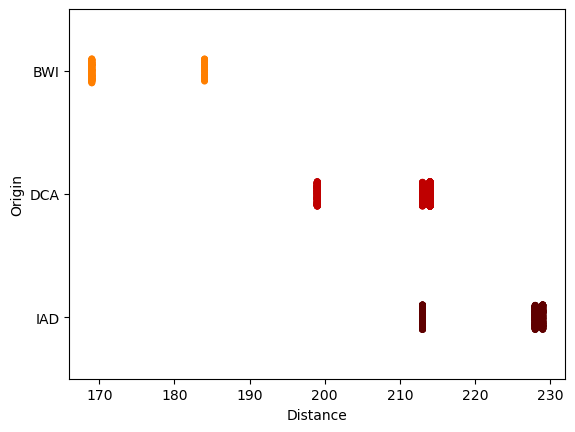

In [38]:
#stripplot for distance and origin of the flight
sns.stripplot(x='Distance',y='Origin',data=df,dodge=True,palette='gist_heat_r')

This strip plot marks the relation between distance and origin

- `DCA` has more origin at a distance of 210 to 220
- `IAD` has more origin at a distance of 220 to 230

### Jointplots for plotting flight number and status of the fight 

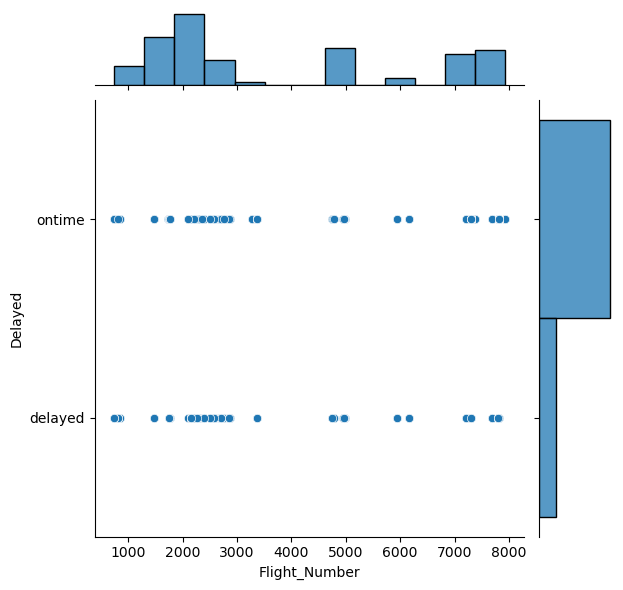

In [42]:
#joint plot for flight number and delayed parameter
sns.jointplot(x='Flight_Number',y='Delayed',data=df)

This jointplot shows the relation between flight number and delay time as a scatter and histplot. 

- Maximum he flights were `On-time`
- Flight number ranging between 2000 and 3000 were more `On-time`. 

# MODEL TRAINING

Various Machine Learning algorithms are used to train a model to give a prediction based on the available datas. Many functions and libraries are used for precise prediction of data. Various algorithms are used for predicting the desired parameters. One such method used in this system is the `Naive Bayes Probabilty` theorem for predicting values

#### Naive bayes can be classified into three types namely 
        GAUSSIAN     : for continous data
        MULTINOMIAL  : for discrete data
        BERNOULLI    : for binary data
        
#### `Gaussian` model is used here for the prediction

To predict accurately, only essential features are required and others can be dropped
Here the essential features are


  - Carrier
  - Departure time
  - Destination
  - Origin
  - Day of the week
 
 Having `5` number of features, a target variable is fixed which is `Delayed` in our case

A temporary variable is created for storing only the essential features required to train the model. 

In [44]:
#dropping of unwanted features and assigning necessary features
temp=['Day_of_the_Month','Flight_Number','Date','Distance']
inputs=df.drop(temp,axis=1)

In [45]:
inputs

,Carrier,Departure_Time,Destination,Origin,Day_of_the_Week,Delayed
0,OH,14,JFK,BWI,4,ontime
1,DH,16,JFK,DCA,4,ontime
2,DH,12,LGA,IAD,4,ontime
3,DH,17,LGA,IAD,4,ontime
4,DH,10,LGA,IAD,4,ontime
...,...,...,...,...,...,...
2194,RU,6,EWR,DCA,6,ontime
2195,RU,16,EWR,IAD,6,ontime
2196,RU,15,EWR,DCA,6,ontime
2197,RU,14,EWR,DCA,6,ontime


This new data has `5` features and also the target variable `delayed`

Certain libraries are imported for predicitng the features and to produce the output. With these libraries, models are trained based on probablity theorem such as `Naive Bayes` which is been used in our prediction.

In [46]:
#importing libraries for training the model
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score

Also models could predict only the `numerical datas` (only numbers). 

Features which having categorical datas are converted into numerical data using various methods are known as encoding.

There are several encoding methods been used such as

- OneHotLabel
- LabelEncoder
- BinaryEncoding

##### `Label encoding` type is used in here to convert categorical data into numerical data
     
   - This method assigns unique numerical value to each category having similar values.
     
Target feature has also been converted into numerical data as the prediction is based on the target feature
       
       - Delayed -0
       - Ontime  -1

In [47]:
le=LabelEncoder()

In [48]:
dfle=inputs
dfle.Carrier=le.fit_transform(dfle.Carrier)
dfle.Destination=le.fit_transform(dfle.Destination)
dfle.Origin=le.fit_transform(dfle.Origin)
dfle.Delayed=le.fit_transform(dfle.Delayed)
dfle

,Carrier,Departure_Time,Destination,Origin,Day_of_the_Week,Delayed
0,4,14,1,0,4,1
1,1,16,1,1,4,1
2,1,12,2,2,4,1
3,1,17,2,2,4,1
4,1,10,2,2,4,1
...,...,...,...,...,...,...
2194,5,6,0,1,6,1
2195,5,16,0,2,6,1
2196,5,15,0,1,6,1
2197,5,14,0,1,6,1


Target feature has been assigned 

In [49]:
#delayed is set as target variable
target=dfle.Delayed
target

0       1
1       1
2       1
3       1
4       1
       ..
2194    1
2195    1
2196    1
2197    1
2198    1
Name: Delayed, Length: 2199, dtype: int32

It is essential to seperate the target variable from the other feature so that the datasplit occurs without any errors. Target feature gets dropped from other columns and stored in a different variable

In [50]:
#seperation of target feature
gets=dfle.drop('Delayed',axis='columns')
gets

,Carrier,Departure_Time,Destination,Origin,Day_of_the_Week
0,4,14,1,0,4
1,1,16,1,1,4
2,1,12,2,2,4
3,1,17,2,2,4
4,1,10,2,2,4
...,...,...,...,...,...
2194,5,6,0,1,6
2195,5,16,0,2,6
2196,5,15,0,1,6
2197,5,14,0,1,6


### TEST-TRAIN SPLIT

Model will be trained based on the train and test splitting of data. Generally 80% of data will be used for training the model and 20% of data as testing model. Based on the training model, the model will be trained to predict the results of the testing data. 

Our model contains 2199 number of datas where `2100` are split into training model and other `99` as testing model

In [51]:
#spliting of dataset with correct proportion
x_train,x_test,y_train,y_test=train_test_split(gets,target,test_size=99,random_state=5)

In [52]:
#displaying x train set variable
x_train

,Carrier,Departure_Time,Destination,Origin,Day_of_the_Week
1648,7,12,2,1,5
54,1,17,2,2,5
1830,3,20,2,1,1
1073,5,6,0,2,4
1828,3,9,2,1,1
...,...,...,...,...,...
740,5,10,0,0,7
1032,2,16,2,1,4
2121,7,18,2,1,5
1424,5,18,0,2,2


Length of train and test is evaluated to check the correctness of data split

In [53]:
len(x_train)

2100

In [54]:
len(x_test)

99

In [55]:
#displaying y train set variable
y_train

1648    0
54      1
1830    0
1073    0
1828    0
       ..
740     1
1032    1
2121    1
1424    1
1725    1
Name: Delayed, Length: 2100, dtype: int32

In [56]:
#displaying y test set variable
y_test

653     1
417     1
2172    1
1351    1
723     1
       ..
1036    0
1282    1
1190    1
1383    1
1244    0
Name: Delayed, Length: 99, dtype: int32

In [57]:
len(y_train)

2100

In [58]:
len(y_test)

99

Training and test datas are correctly splitted as mentioned

As our model consists of continous data, `Gaussian method` of Naive Bayes is used for prediction of flight status

In [44]:
model=GaussianNB()

In [54]:
#fitting of trained dataset
model.fit(x_train,y_train)

GaussianNB()

In [55]:
#generating model score
model.score(x_test,y_test)

0.8282828282828283

Model score is checked to accuracy of the model. Our model generated 84% percentage of accuracy meaning that it is `82%` nearer to the actual result

In [56]:
#prediction of x test variable
pr=model.predict(x_test)
pr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

### CONFUSION MATRIX

Confusion matrix is a table that is often used to evaluate the performance of a classifier. 

It shows the counts of true and false predictions for each class

In [57]:
#constructing confusion matrix
confusion_matrix(y_true=y_test,y_pred=pr)

array([[ 1, 17],
       [ 0, 81]], dtype=int64)

In [58]:
m=confusion_matrix(y_test,pr,labels=(1,0))

In [59]:
#displaying model classes
model.classes_

array([0, 1])

The array showing 0 and 1 means that the matrix only has true(1) or false(0)

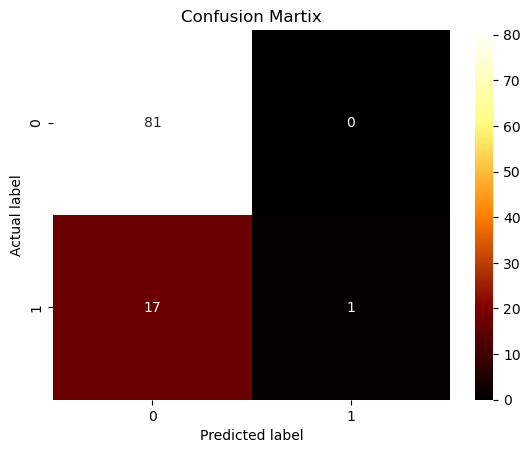

In [69]:
#plotting of confusion matrix
k=sns.heatmap(m,annot=True,cmap='afmhot')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Martix')
plt.show()

The confusion matrix evaluates the correctness of our model prediction.

There are mainly `four` terms involved in this

- True positive(1,1)
- True negative(0,0)
- False positive(1,0)
- False negative(0,1)

TRUE POSITIVE (TP)  - value predicted as `On-Time` resulted as `On-Time`

TRUE NEGATIVE (TN) - value predicted as `Delayed` resulted as `Delayed`

FALSE POSITIVE (FP) - value predicted as `On-Time` resulted as `Delayed` 

FALSE NEGATIVE (FN) - value predicted as `Delayed` resulted as `On-Time`

In [62]:
recall_score(y_test,pr)

1.0

In [63]:
accuracy_score(y_test,pr)

0.8282828282828283

Recall and accuracy score were checked for the model training

Recall score being `1.0`

Accuracy score being `82%`

##### Recall Score
Recall score is used for evaluating whether the given data point relates to the particular class or not (TP,TN,FP,FN)
##### Accuracy score
It is the proportion of correctly predicted classes to the total present in the dataset.